In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

from api_keys import api_key


from citipy import citipy

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

622

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found.")


print("Complete")


Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : saldanha
Processing Record 2 of Set 1 : itarema
Processing Record 3 of Set 1 : bitung
Processing Record 4 of Set 1 : laguna
Processing Record 5 of Set 1 : mataura
Processing Record 6 of Set 1 : shingu
Processing Record 7 of Set 1 : seoul
Processing Record 8 of Set 1 : luderitz
Processing Record 9 of Set 1 : punta arenas
Processing Record 10 of Set 1 : ribeira grande
Processing Record 11 of Set 1 : yellowknife
Processing Record 12 of Set 1 : nyurba
Processing Record 13 of Set 1 : chapleau
Processing Record 14 of Set 1 : atuona
Processing Record 15 of Set 1 : hilo
Processing Record 16 of Set 1 : nanortalik
Processing Record 17 of Set 1 : kailua
Processing Record 18 of Set 1 : mana
Processing Record 19 of Set 1 : sao miguel do araguaia
Processing Record 20 of Set 1 : myitkyina
Processing Record 21 of Set 1 : cape town
City not found. Skipping...
Processing Record 22 of Set 1 : dharchula
Processing Recor

Processing Record 33 of Set 4 : port lincoln
Processing Record 34 of Set 4 : alpena
Processing Record 35 of Set 4 : new norfolk
Processing Record 36 of Set 4 : parkes
Processing Record 37 of Set 4 : adrar
Processing Record 38 of Set 4 : katsina
Processing Record 39 of Set 4 : bilma
Processing Record 40 of Set 4 : severo-kurilsk
Processing Record 41 of Set 4 : longyearbyen
Processing Record 42 of Set 4 : erzincan
Processing Record 43 of Set 4 : esperance
Processing Record 44 of Set 4 : jaguarari
Processing Record 45 of Set 4 : uberaba
Processing Record 46 of Set 4 : key west
City not found. Skipping...
Processing Record 47 of Set 4 : mount gambier
Processing Record 48 of Set 4 : coahuayana
Processing Record 49 of Set 4 : shimoda
Processing Record 50 of Set 4 : otuzco
Processing Record 0 of Set 5 : changli
Processing Record 1 of Set 5 : denham springs
Processing Record 2 of Set 5 : pisco
City not found. Skipping...
Processing Record 3 of Set 5 : gat
Processing Record 4 of Set 5 : necoche

Processing Record 22 of Set 8 : hovd
Processing Record 23 of Set 8 : moerai
Processing Record 24 of Set 8 : balkanabat
Processing Record 25 of Set 8 : mandera
Processing Record 26 of Set 8 : cache creek
Processing Record 27 of Set 8 : kikwit
Processing Record 28 of Set 8 : alyangula
Processing Record 29 of Set 8 : kuala pilah
Processing Record 30 of Set 8 : qaqortoq
Processing Record 31 of Set 8 : novyy urengoy
Processing Record 32 of Set 8 : oranjestad
City not found. Skipping...
Processing Record 33 of Set 8 : weihe
Processing Record 34 of Set 8 : santiago de cuba
Processing Record 35 of Set 8 : vardo
Processing Record 36 of Set 8 : kieta
Processing Record 37 of Set 8 : rockland
City not found. Skipping...
Processing Record 38 of Set 8 : antofagasta
Processing Record 39 of Set 8 : miles city
Processing Record 40 of Set 8 : sfantu gheorghe
Processing Record 41 of Set 8 : faanui
Processing Record 42 of Set 8 : cockburn town
Processing Record 43 of Set 8 : sorland
Processing Record 44 o

Processing Record 5 of Set 12 : marawi
Processing Record 6 of Set 12 : mandalgovi
Processing Record 7 of Set 12 : manokwari
Processing Record 8 of Set 12 : manyana
Processing Record 9 of Set 12 : bay roberts
Processing Record 10 of Set 12 : benguela
Processing Record 11 of Set 12 : sikasso
Processing Record 12 of Set 12 : rodrigues alves
Processing Record 13 of Set 12 : ambon
Processing Record 14 of Set 12 : lipari
-----------------------------
Data Retrieval Complete
-----------------------------


In [5]:

weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})


In [6]:
weather_dict.count()

City          575
Cloudiness    575
Country       575
Date          575
Humidity      575
Lat           575
Lng           575
Max Temp      575
Wind Speed    575
dtype: int64

In [7]:
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saldanha,0,ZA,1579902556,82,-33.01,17.94,66.20,5.82
1,Itarema,41,BR,1579902556,68,-2.92,-39.92,81.05,7.99
2,Bitung,20,ID,1579902556,94,1.45,125.18,73.40,0.63
3,Laguna,1,US,1579902556,82,38.42,-121.42,66.99,4.70
4,Mataura,98,NZ,1579902556,95,-46.19,168.86,59.00,10.00
...,...,...,...,...,...,...,...,...,...
570,Benguela,85,AO,1579902631,79,-12.58,13.41,78.35,4.14
571,Sikasso,72,ML,1579902631,10,10.92,-7.00,78.53,6.29
572,Rodrigues Alves,20,BR,1579902631,62,-7.74,-72.65,87.80,3.36
573,Ambon,20,ID,1579902632,88,-3.70,128.18,75.20,9.17


In [8]:
weather_dict.to_csv("output_data/cities.csv", index = False)

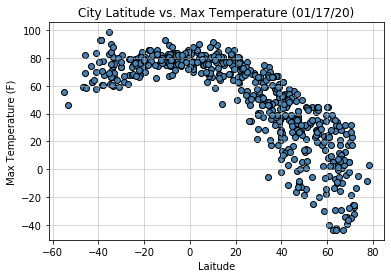

In [9]:
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (01/17/20)")

plt.xlabel("Laitude")

plt.ylabel("Max Temperature (F)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("../Images/City Latitude vs Max Temperature.png")

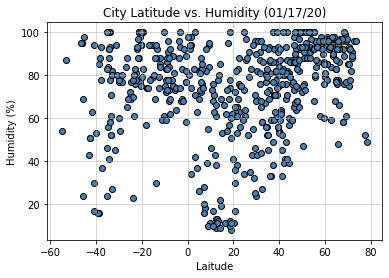

In [10]:

plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")


plt.title("City Latitude vs. Humidity (01/17/20)")

plt.xlabel("Laitude")

plt.ylabel("Humidity (%)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("../Images/City Latitude vs Humidity.png")

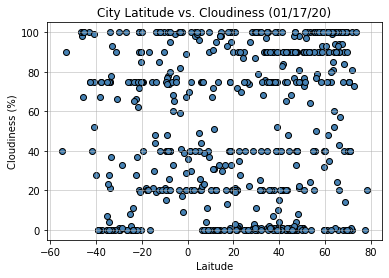

In [11]:

plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (01/17/20)")

plt.xlabel("Laitude")

plt.ylabel("Cloudiness (%)")

plt.ylim(-5,105)


plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("../Images/City Latitude vs Cloudiness.png")

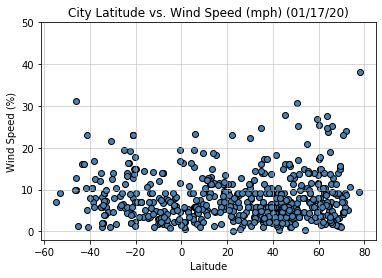

In [12]:

plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

plt.xlabel("Laitude")

plt.ylabel("Wind Speed (%)")


plt.ylim(-2,50)


plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

In [13]:

northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [14]:

def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq


def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.83


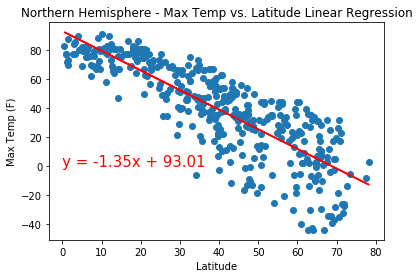

In [15]:

equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

annotate(equation, 0, 0)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")